In [1]:
import numpy as np
from scipy.stats import multivariate_normal, invwishart, invgamma, wishart, dirichlet, norm
import matplotlib.pyplot as plt
import seaborn as sns

# Synthetic data

## Sample generation

In [2]:
import sys
sys.path.insert(0, '..')

from models.biscuit import Biscuit

In [3]:
biscuit = Biscuit()

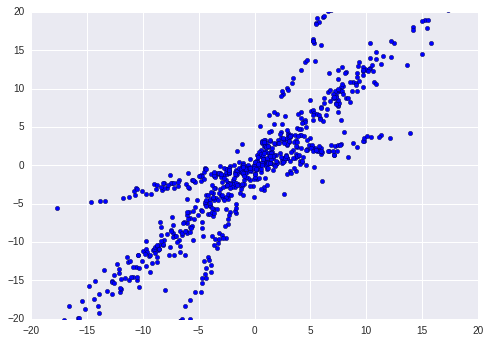

pi: [[ 0.47510108]
 [ 0.32283811]
 [ 0.20206081]]

mu: [[  4.42488285   5.40348479]
 [ -9.49420097 -29.47292734]
 [  2.8683229    0.95252912]]

cov: [[[ 0.08519492  0.328135  ]
  [ 0.328135    1.27207034]]

 [[ 0.18332674  0.78999183]
  [ 0.78999183  3.40596546]]

 [[ 0.00434849  0.01848437]
  [ 0.01848437  0.08503839]]]

assigment counts 0: 451
assigment counts 1: 345
assigment counts 2: 204


In [6]:
N = 1000
d = 2
K = 3

X = multivariate_normal.rvs(mean=[0., 0.], cov=2*np.eye(2), size = N)

biscuit.set_random_parameters(X, K)
X, z = biscuit.sample(N)
    
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-20, 20, -20, 20])
plt.show()

print("pi: " + str(biscuit.pi))
print("")
print("mu: " + str(biscuit.mu))
print("")
print("cov: " + str(biscuit.cov))
print("")
for i in range(K):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(z == i)))

## Clustering
Fit a DPMM with scalings to the generated data and evaluate the obtained clustering with a confusion matrix.